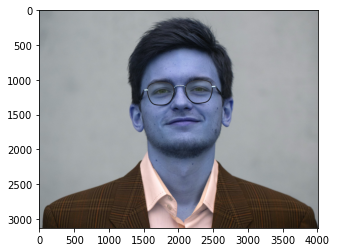

In [20]:
import cv2
import matplotlib.pyplot as plt

###loading image using cv2

img = cv2.imread("photo_test.jpg") # fonction for charging the image

### First step generating the raw photo
##showing image using plt in color BGR by default

plt.imshow(img)
plt.show()


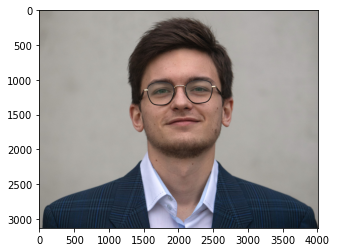

In [21]:
import cv2
import matplotlib.pyplot as plt

###loading image using cv2

img = cv2.imread("photo_test.jpg") # fonction for charging the image

### We transform the color BGR in RGB to have the real color of the photo
# We use cv2.cvtColor and then showing the image with plt
color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(color_img)
plt.show()

In [4]:
from deepface import DeepFace 
prediction = DeepFace.analyze(color_img) #Analyse of the image with the pre-train model Deepface in order to recognize emotions, the race, the age...

Action: race: 100%|██████████| 4/4 [00:31<00:00,  7.80s/it]   


In [5]:
prediction #Display the results

{'emotion': {'angry': 0.00043136865315318573,
  'disgust': 5.352979886609488e-11,
  'fear': 0.0005538270670513157,
  'happy': 98.2509970664978,
  'sad': 0.9149658493697643,
  'surprise': 2.22558558249375e-06,
  'neutral': 0.833056028932333},
 'dominant_emotion': 'happy',
 'region': {'x': 1274, 'y': 521, 'w': 1539, 'h': 1539},
 'age': 26,
 'gender': 'Man',
 'race': {'asian': 1.556966644500335e-06,
  'indian': 1.566382223927576e-06,
  'black': 1.1570382152381598e-08,
  'white': 99.91118311882019,
  'middle eastern': 0.021198853210080415,
  'latino hispanic': 0.06761472905054688},
 'dominant_race': 'white'}

In [6]:
prediction['dominant_emotion'] #Display of the dominant emotion 

'happy'

#Creation of a rectangle on the face

In [7]:
#loading our xml file into faceCascade using cv2.CascadeClassifier 
# Classifier allow us to detect objects
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Detect object in gray

#detecting face in color_image and getting 4 points(x,y,u,v) around face from the image, and assigning those values to 'faces' variable 
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#using that 4 points to draw a rectangle around face in the image
for (x, y, u, v) in faces:
    cv2.rectangle(color_img, (x,y), (x+u, y+v), (0, 0, 255), 15)
    


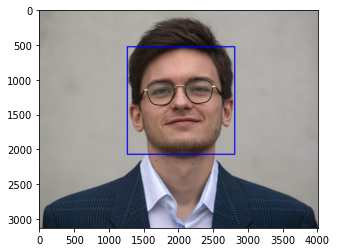

In [9]:
plt.imshow(color_img)

In [10]:
font = cv2.FONT_HERSHEY_SIMPLEX #Choice of the font

#Display of the text of the function prediction on color_img 
cv2.putText(color_img,prediction['dominant_emotion'],(0,500), font, 12, (255,0,0),8) 

array([[[145, 142, 135],
        [144, 141, 134],
        [146, 143, 136],
        ...,
        [171, 170, 166],
        [163, 162, 158],
        [167, 166, 162]],

       [[144, 141, 134],
        [158, 155, 148],
        [154, 151, 144],
        ...,
        [164, 163, 159],
        [159, 158, 154],
        [163, 162, 158]],

       [[148, 145, 138],
        [158, 155, 148],
        [143, 140, 133],
        ...,
        [155, 154, 150],
        [146, 145, 141],
        [153, 152, 148]],

       ...,

       [[147, 144, 139],
        [156, 153, 148],
        [141, 138, 133],
        ...,
        [ 57,  57,  57],
        [ 70,  69,  67],
        [ 70,  69,  67]],

       [[148, 145, 140],
        [156, 153, 148],
        [141, 138, 133],
        ...,
        [ 62,  62,  62],
        [ 72,  71,  69],
        [ 70,  69,  67]],

       [[146, 143, 138],
        [139, 136, 131],
        [120, 117, 112],
        ...,
        [ 60,  60,  60],
        [ 70,  69,  67],
        [ 70,  69,  67]]

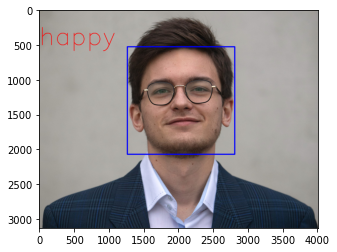

In [11]:
plt.imshow(color_img) #Display the photo

Put all codes in one python window

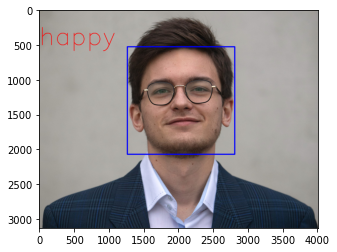

In [12]:
import cv2


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Detect object in gray

#detecting face in color_image and getting 4 points(x,y,u,v) around face from the image, and assigning those values to 'faces' variable 
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#using that 4 points to draw a rectangle around face in the image
for (x, y, u, v) in faces:
    cv2.rectangle(color_img, (x,y), (x+u, y+v), (0, 0, 255), 15)
    
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(color_img,prediction['dominant_emotion'],(0,500), font, 12, (255,0,0),8)

plt.imshow(color_img)

In [13]:
#import cv2
#from deepface import DeepFace


# define a video capture object
#cam = cv2.VideoCapture(0)
  
#while(True):
      
    # Capture the video frame
    # by frame
    #ret, frame = cam.read()
    
     
    # Display the resulting frame
    #cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    #if cv2.waitKey(1) & 0xFF == ord('q'):
        #break
  
# After the loop release the cap object
#cam.release()
# Destroy all the windows
#cv2.destroyAllWindows()

Now we do the same for a video 

In [3]:
import cv2
from deepface import DeepFace

# detect objects and we concentrate on faces
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml') 


# define a video capture object. Here it will be the camera of the computer
cam = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = cam.read() #Reading of the frame
    
    prediction = DeepFace.analyze(frame, actions = ['emotion']) #Analyse of the emotions from objects in the frame   
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    faces = faceCascade.detectMultiScale(frame, 1.1, 4) #Detection of objects
    
    #Creation of a rectangle on the object
    for (x, y, u, v) in faces:
        cv2.rectangle(frame, (x,y), (x+u, y+v), (0, 0, 225), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,prediction['dominant_emotion'],(50,50), font, 3, (255,0,0),2) #Display the emotion on the video   
    
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button. We can use an other letter if needed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
cam.release()
# Destroy all the windows
cv2.destroyAllWindows()